# Schelling's model of segregation

Described [here](https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation).

Implementation method [here](http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

INITIAL VALUES FOR VARIABLES

In [2]:
N  = 10

density = 0.5  #starting percentage
f1      = 0.4  #fraction of '1' in starting population
f_1     = 1-f1 #fraction of '-1' in starting population

t  =  0.5      #percentage of neighbourhood that must be like the agent

# define color map 
color_map = {-1: np.array([255, 0, 0]), # red
             0: np.array([255, 255, 255]), # green
             1: np.array([0, 0, 255])} # blue 

In [3]:
#initialize matrix
matrix = list()

for i in range(N):
    linha = list()
    for j in range(N):
        linha.append(0)
    matrix.append(linha)       

In [4]:
#fill matrix
for linha in range(len(matrix)):
    for coluna in range(len(matrix[linha])):
        if (rd.random() <= density):
            if (rd.random() <= f1):
                matrix[linha][coluna] = 1
            else:
                matrix[linha][coluna] = -1

Code to manipulate color from [here](https://stackoverflow.com/questions/37719304/python-imshow-set-certain-value-to-defined-color).

In [5]:
def print_matrix(matrix):
    # make a 3d numpy array that has a color channel dimension   
    data_3d = np.ndarray(shape=(N, N, 3), dtype=int)
    for i in range(0, N):
        for j in range(0, N):
            data_3d[i][j] = color_map[matrix[i][j]]

    plt.imshow(data_3d)

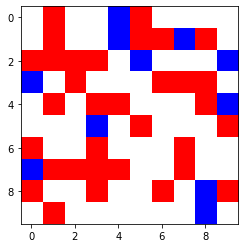

In [6]:
print_matrix(matrix)

In [7]:
def get_neighbours(coordinates, N):
    neighbours = list()
    n_range    = [-1, 0, 1]
    [x, y]     = coordinates
    
    for i in n_range:
        for j in n_range:
            if ((x+i >= 0 and x+i < N) and (y+j >= 0 and y+j < N)) and (not (i == 0 and j == 0)):
                neighbours.append([coordinates[0]+i, coordinates[1]+j])
                  
    return neighbours

def get_empty_space(matrix):
    empty_coords = list()
    for linha in range(len(matrix)):
        for coluna in range(len(matrix)):
            if matrix[linha][coluna] == 0:
                empty_coords.append([linha, coluna])
            
def check_neighbours(coordinates, matrix):
    N = len(matrix)
    neighbours = get_neighbours(coordinates,N)
    content = list()
    
    content = [matrix[pos[0]][pos[1]] for pos in neighbours]
    
    return content

In [8]:
print(get_neighbours([1,1], N))
check_neighbours([1, 1], matrix)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]


[0, -1, 0, 0, 0, -1, -1, -1]

We now need to find the dissatisfied agents

In [9]:
#algo return 1 if agent gathers conditions that satisfy dissatisfaction and 0 if it doesn't

# algo(coordinates, matrix)
def get_dissatisfied(matrix, algo):
    dissatisfied = list()
    for linha in range(len(matrix)):
        for coluna in range(len(matrix)):
            if algo([linha, coluna], matrix):
                dissatisfied.append([linha, coluna])
    return dissatisfied

Simple algorithm that checks if theres a minimum percentage of t neighbours around

In [10]:
def dis_algo(coord, matrix):
    agent_val = matrix[coord[0]][coord[1]]
    n_agents  = check_neighbours(coord, matrix)
    
    n_1 = 0
    n0  = 0
    n1  = 0
    
    for agent in n_agents:
        if agent == -1:
            n_1 += 1
        if agent == 0:
            n0  += 1
        if agent == 1:
            n1  += 1
            
    val_sum = {-1:n_1, 0:n0, 1:n1}
       
    if val_sum[agent_val]/(n_1 + n0 + n1) < t:
        return 1
    return 0

In [11]:
def iterate(matrix):
    dissatisfied = get_dissatisfied(matrix, dis_algo)
    empy_space   = get_empty_space(matrix)
    
    

In [12]:
#generates 100 vals between 0 and 3

vals = [round(rd.uniform(-0.5, 3.5), 0) for i in range(100)]